# Exercises

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

**Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.**

**1. Using lemonade.csv dataset and focusing on continuous variables:**

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.isna().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [32]:
def get_low_and_up_bounds_df(df, k=1.5):
    '''
    This function takes in a pandas dataframe, list of columns, and k value, and will print out upper and lower bounds for each column.
    It takes in a default argument of the col_list being all numeric columns, and the k value=1.5
    '''
    from IPython.display import display, display_html
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    for col in col_list:
        # Find the lower and upper quartiles
        q_25, q_75 = df[col].quantile([0.25, 0.75])
        # Find the Inner Quartile Range
        q_iqr = q_75 - q_25
        # Find the Upper Bound
        q_upper = q_75 + (k * q_iqr)
        # Find the Lower Bound
        q_lower = q_25 - (k * q_iqr)
        # Identify outliers
        outliers_lower = df[df[col] < q_lower]
        outliers_upper = df[df[col] > q_upper]
        # outliers_all = pd.concat([outliers_lower, outliers_upper], axis=0)
        print('')
        print(col)
        print(f'K: {k}')
        print(f'Lower Fence: {q_lower}')
        print(f'Upper Fence: {q_upper}')
        print('')
        print(f'Lower Outliers in {col}')
        print('')
        display(outliers_lower)
        print('')
        print(f'Upper Outliers in {col}')
        print('')
        display (outliers_upper)
        print('')
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        sns.histplot(data = df, x = col, kde=True)
        plt.axvline(x = q_lower, color = 'orange')
        plt.axvline(x = q_upper, color= 'orange')
        plt.title(col)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=col, data=df, whis = k)
        plt.title(col)
        plt.show()
        print('-------------------------------------------------------------------')


Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7



Upper Outliers in Temperature



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


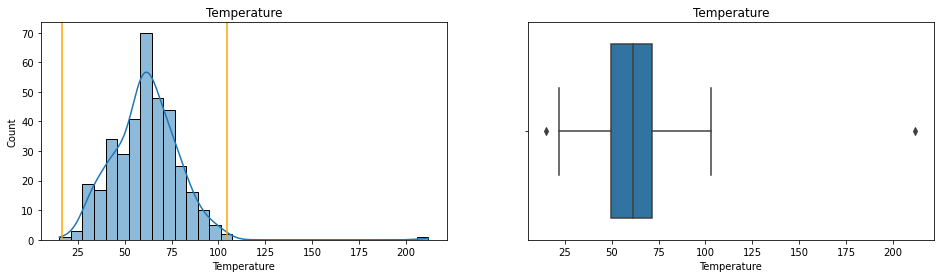

-------------------------------------------------------------------

Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales



Upper Outliers in Rainfall



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


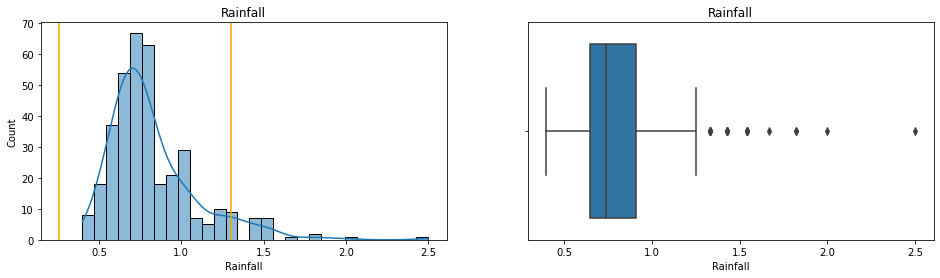

-------------------------------------------------------------------

Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20



Upper Outliers in Flyers



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


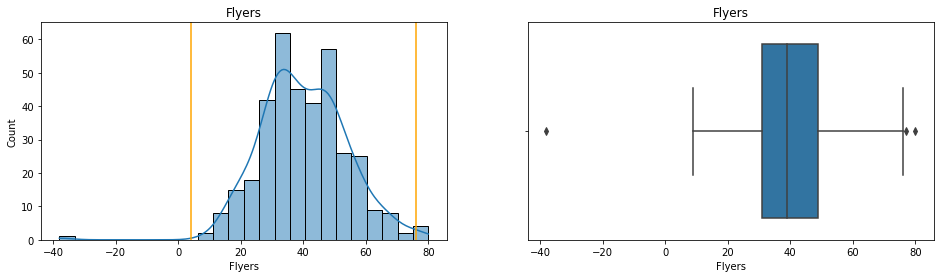

-------------------------------------------------------------------

Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales



Upper Outliers in Price



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


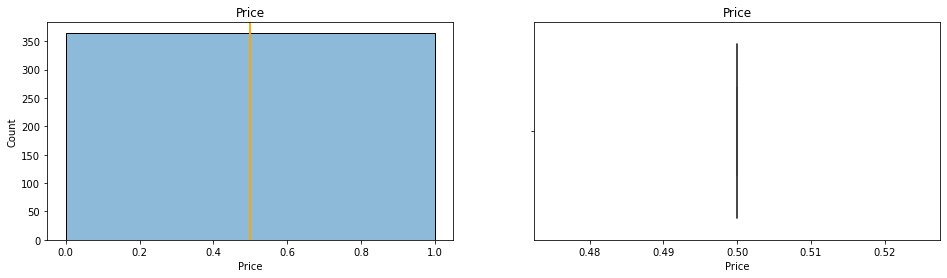

-------------------------------------------------------------------

Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales



Upper Outliers in Sales



,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


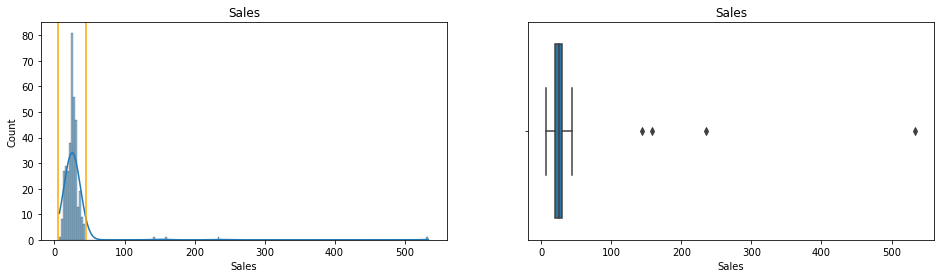

-------------------------------------------------------------------


In [33]:
get_low_and_up_bounds_df(df)

    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [34]:
df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10



Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature



,Temperature
364,15.1



Upper Outliers in Temperature



,Temperature
41,212.0


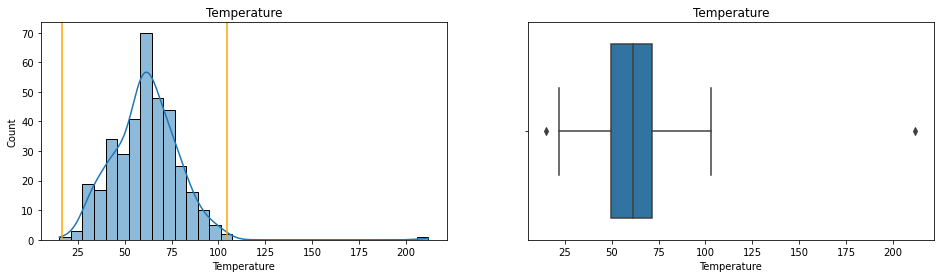

-------------------------------------------------------------------


In [35]:
get_low_and_up_bounds_df(df[['Temperature']])

**temperature**
-I should keep the lower outliers, it does not make sense to keep the upper outlier


Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall



,Rainfall



Upper Outliers in Rainfall



,Rainfall
0,2.00
1,1.33
2,1.33
5,1.54
6,1.54
10,1.54
11,1.33
12,1.33
15,1.67
16,1.43


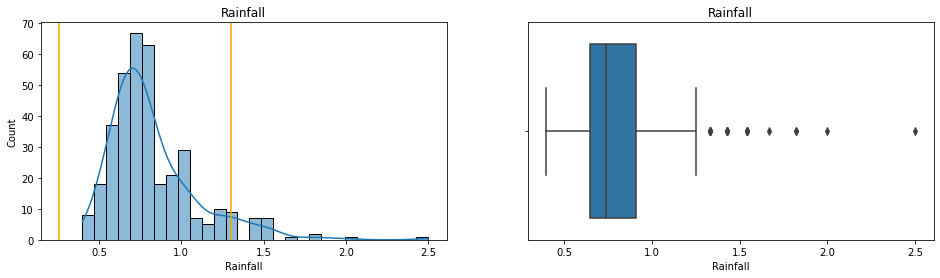

-------------------------------------------------------------------


In [36]:
get_low_and_up_bounds_df(df[['Rainfall']])

**Rainfall**
- ther is not lower outliers
- there is a value about 2.5


Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers



,Flyers
324,-38



Upper Outliers in Flyers



,Flyers
166,77
194,80


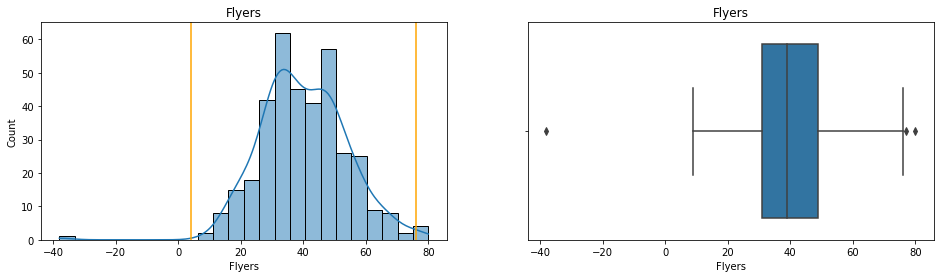

-------------------------------------------------------------------


In [37]:
get_low_and_up_bounds_df(df[['Flyers']])

**Flyers: -38 value it does not make sense**


Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Price



Upper Outliers in Price



,Price


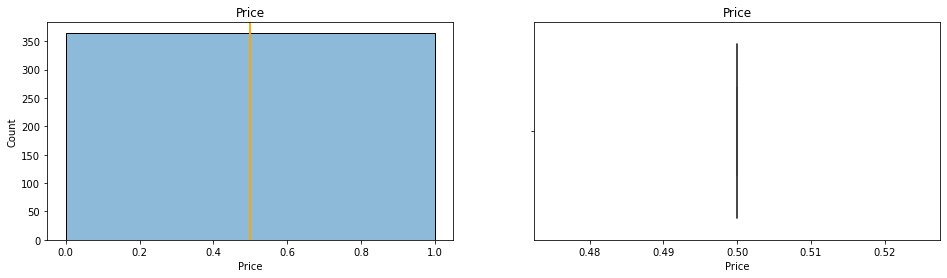

-------------------------------------------------------------------


In [38]:
get_low_and_up_bounds_df(df[['Price']])

**Note: no outliers in Price**


Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales



,Sales



Upper Outliers in Sales



,Sales
181,143
182,158
183,235
184,534


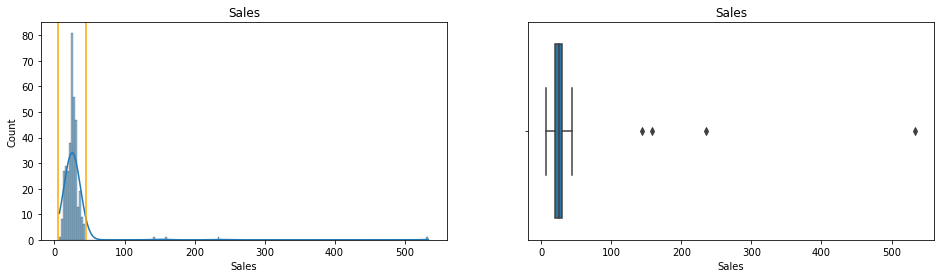

-------------------------------------------------------------------


In [39]:
get_low_and_up_bounds_df(df[['Sales']])

**Note: no lower outliers but there are upper outliers. aupper outlier > 500 ??**

In [40]:
##practicing functions

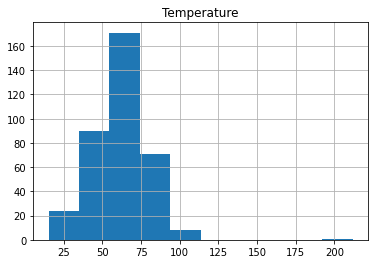

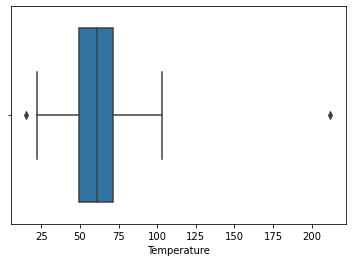

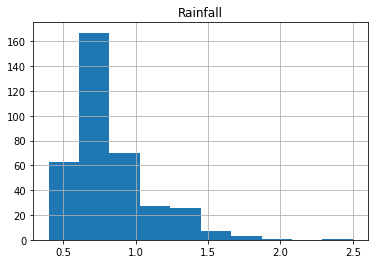

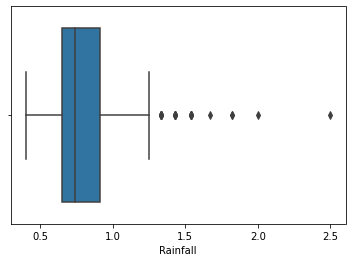

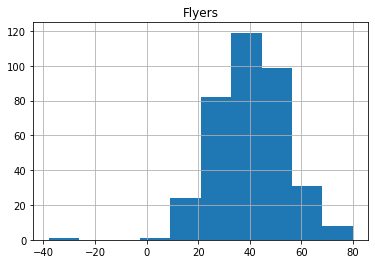

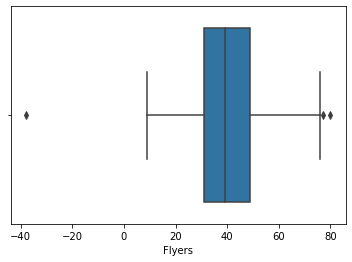

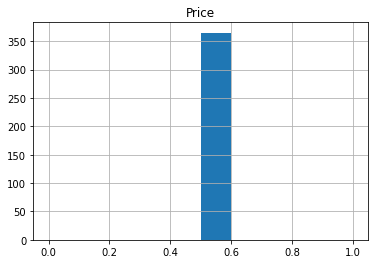

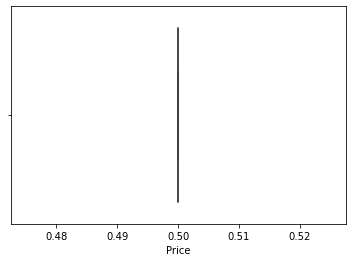

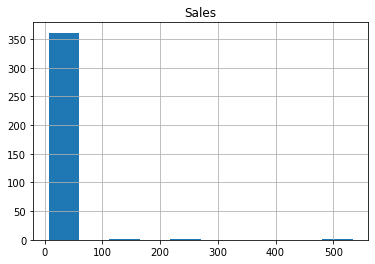

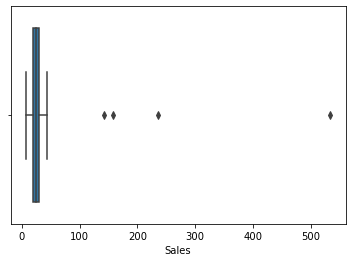

In [41]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

**steps to defining IQR/Tukey method:**

In [16]:
# get the Q1 and Q3 values
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)

In [17]:
q1, q3

(49.7, 71.7)

In [18]:
iqr = q3 - q1
iqr

22.0

In [19]:
# determine our multiplier
multiplier = 1.5

In [20]:
# use these qualities to assert abnormalities

inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [21]:
inner_lower_fence

16.700000000000003

In [22]:
inner_upper_fence


104.7

In [23]:
#checking the  lower outliers 
df[(df['Temperature'] < inner_lower_fence)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [24]:
def get_lower_and_upper_bounds2(df, k = 1.5):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            # get the Q1 and Q3 values
            q1 = df.Temperature.quantile(0.25)
            q3 = df.Temperature.quantile(0.75)
            # Find the Inner Quartile Range
            iqr = q3 - q1
            # Find the Upper Bound
            q_upper = q3 + (k * iqr)
            # Find the Lower Bound
            q_lower = q1 - (k * iqr)
            outliers_lower = df[(df[col] < q_lower)]
            outliers_upper = df[(df[col] > q_upper)]
            print ('***', col, '***')
            print ('lower quartile value: ', q1)
            print ('Upper quartile value: ', q3)
            print(' ')
            print(f'Lower Outliers in {col}')
            print('')
            print(outliers_lower)
            print('')
            print(f'Upper Outliers in {col}')
            print('')
            print(outliers_upper)
            print('')
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = col, kde=True)
            plt.plot([2.8, 2.8], [0, max(df)])
            plt.title(col)
#             plt.plot([q_lower, q_lower], [0, df[col].median()], color = 'orange')
#             plt.plot([q_upper, q_upper], [0, df[col].median()], color = 'orange')
            plt.subplot(1, 2, 2)
            sns.boxplot(x=col, data=df)
            plt.title(col)
            plt.show()
            print('-------------------------------------------------------------------')
            print('')
 

In [25]:
df.Temperature.count()

365

*** Temperature ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Temperature

         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7

Upper Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21



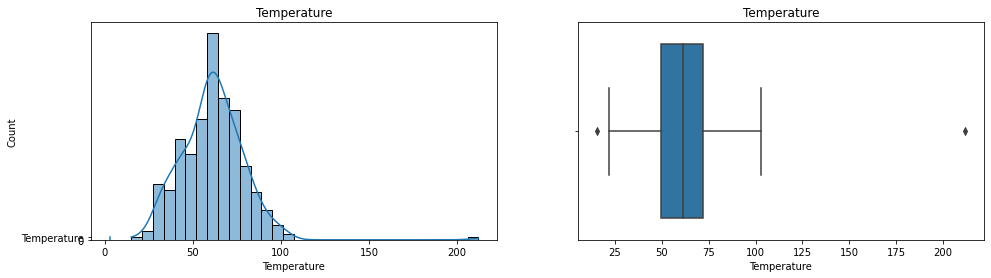

-------------------------------------------------------------------

*** Rainfall ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Rainfall

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
3      1/4/17  Wednesday         44.1      1.05      28    0.5     17
4      1/5/17   Thursday         42.4      1.00      33    0.5     18
..        ...        ...          ...       ...     ...    ...    ...
360  12/27/17  Wednesday         42.7      1.00      33    0.5     19
361  12/28/17   Thursday         37.8      1.25      32    0.5     16
362  12/29/17     Friday         39.5      1.25      17    0.5     15
363  12/30/17   Saturday         30.9      1.43      22    0.5     13
364  12/31/17     Sunday         15.1      2.50       9   

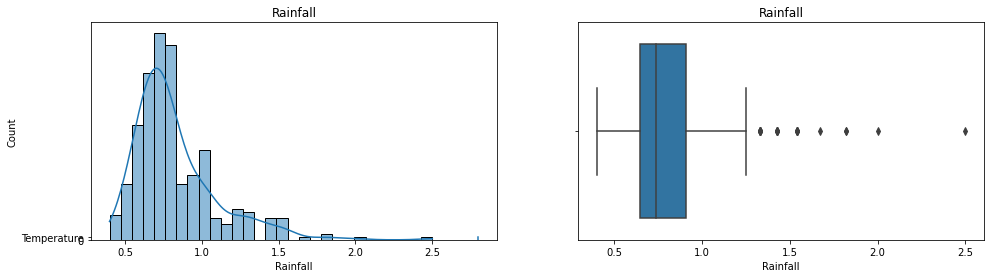

-------------------------------------------------------------------

*** Flyers ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Flyers

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17    Sunday         27.0      2.00      15    0.5     10
1      1/2/17    Monday         28.9      1.33      15    0.5     13
11    1/12/17  Thursday         38.2      1.33      16    0.5     14
20    1/21/17  Saturday         36.2      1.25      16    0.5     14
27    1/28/17  Saturday         34.9      1.33      15    0.5     13
324  11/21/17   Tuesday         47.0      0.95     -38    0.5     20
337   12/4/17    Monday         34.9      1.54      16    0.5     13
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10
343  12/10/17    Sunday         31.3      1.82      15    0.5     11
350  12/17/17    Sunday         32.2      1.33      16    0.5     14
364  12/31/17    Sunday         15.1      2.50       9    0.5      7

Upp

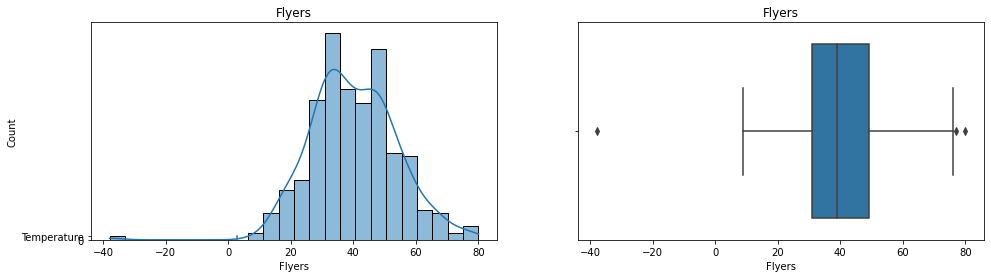

-------------------------------------------------------------------

*** Price ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Price

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
3      1/4/17  Wednesday         44.1      1.05      28    0.5     17
4      1/5/17   Thursday         42.4      1.00      33    0.5     18
..        ...        ...          ...       ...     ...    ...    ...
360  12/27/17  Wednesday         42.7      1.00      33    0.5     19
361  12/28/17   Thursday         37.8      1.25      32    0.5     16
362  12/29/17     Friday         39.5      1.25      17    0.5     15
363  12/30/17   Saturday         30.9      1.43      22    0.5     13
364  12/31/17     Sunday         15.1      2.50       9    0.5  

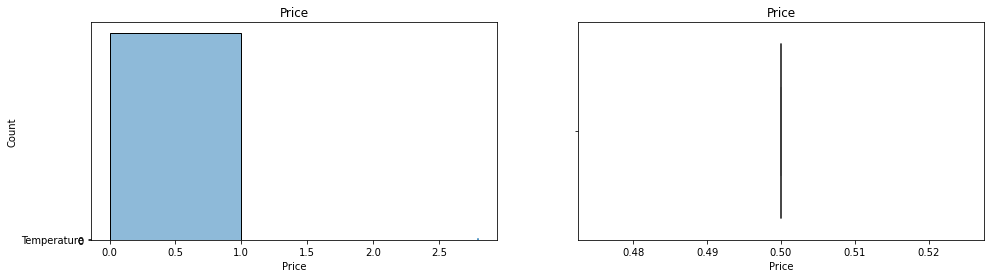

-------------------------------------------------------------------

*** Sales ***
lower quartile value:  49.7
Upper quartile value:  71.7
 
Lower Outliers in Sales

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
7      1/8/17     Sunday         37.5      1.18      28    0.5     15
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5  

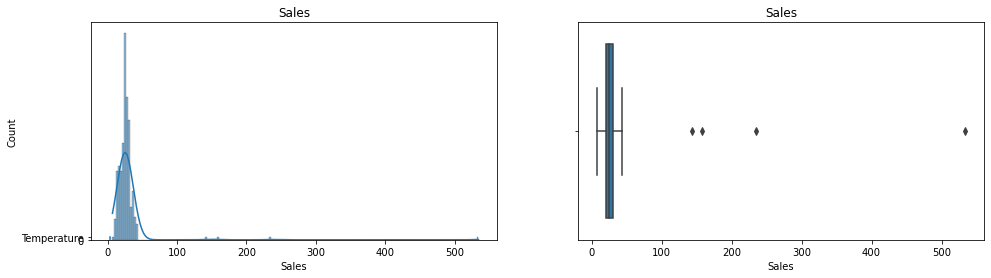

-------------------------------------------------------------------



In [26]:
get_lower_and_upper_bounds2(df)

    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [27]:
df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10



Temperature
K: 3
Lower Fence: -16.299999999999997
Upper Fence: 137.7

Lower Outliers in Temperature



,Temperature



Upper Outliers in Temperature



,Temperature
41,212.0


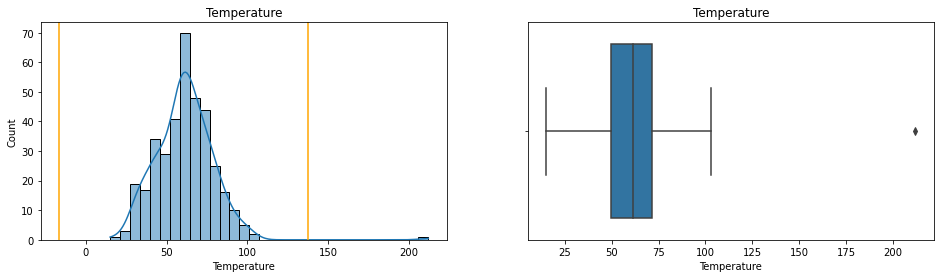

-------------------------------------------------------------------


In [42]:
get_low_and_up_bounds_df(df[['Temperature']], k = 3)

**Note:  there are not lower outliers, there is one upper outlier but I dont think it is correct value**


Rainfall
K: 3
Lower Fence: -0.13
Upper Fence: 1.69

Lower Outliers in Rainfall



,Rainfall



Upper Outliers in Rainfall



,Rainfall
0,2.00
338,1.82
343,1.82
364,2.50


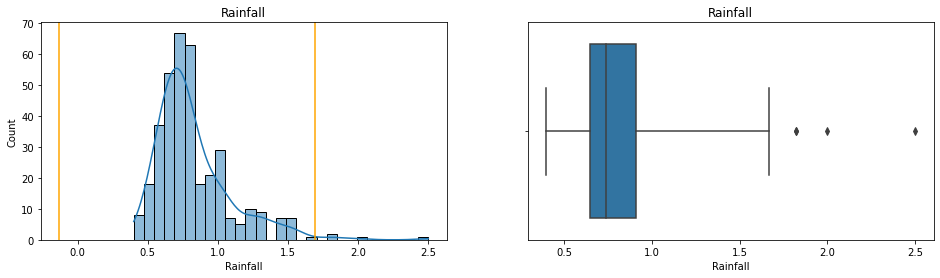

-------------------------------------------------------------------


In [44]:
get_low_and_up_bounds_df(df[['Rainfall']], k = 3)

**note: there is not lower outliers but there are less upper lowers than when we used k=1.5**


Flyers
K: 3
Lower Fence: -23.0
Upper Fence: 103.0

Lower Outliers in Flyers



,Flyers
324,-38



Upper Outliers in Flyers



,Flyers


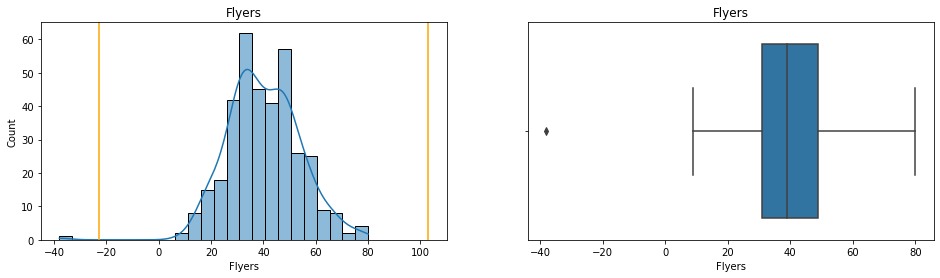

-------------------------------------------------------------------


In [45]:
get_low_and_up_bounds_df(df[['Flyers']], k = 3)

**NOTE:there is not upper outliers. but there is still one lower outlier  -38 which it does not make sense**


Price
K: 3
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price



,Price



Upper Outliers in Price



,Price


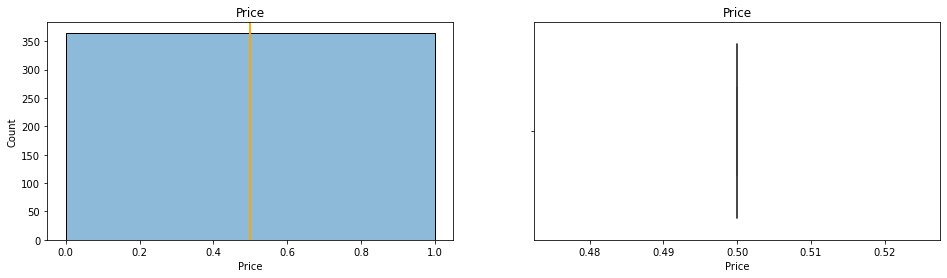

-------------------------------------------------------------------


In [46]:
get_low_and_up_bounds_df(df[['Price']], k = 3)

**Note: there are not outliers at all**


Sales
K: 3
Lower Fence: -10.0
Upper Fence: 60.0

Lower Outliers in Sales



,Sales



Upper Outliers in Sales



,Sales
181,143
182,158
183,235
184,534


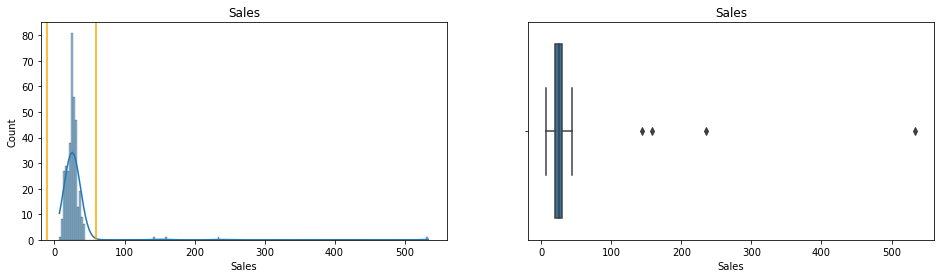

-------------------------------------------------------------------


In [47]:
get_low_and_up_bounds_df(df[['Sales']], k = 3)

**Note: there is not lower outliers but there are upper outliers we can use to see the max sales over all**

**2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:**

    - Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [ ]:
There’s a stats.zscore() method btw makes things easier and cleaner

**3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv**